<a href="https://colab.research.google.com/github/drfperez/algorithms/blob/main/Star%26DjistraAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

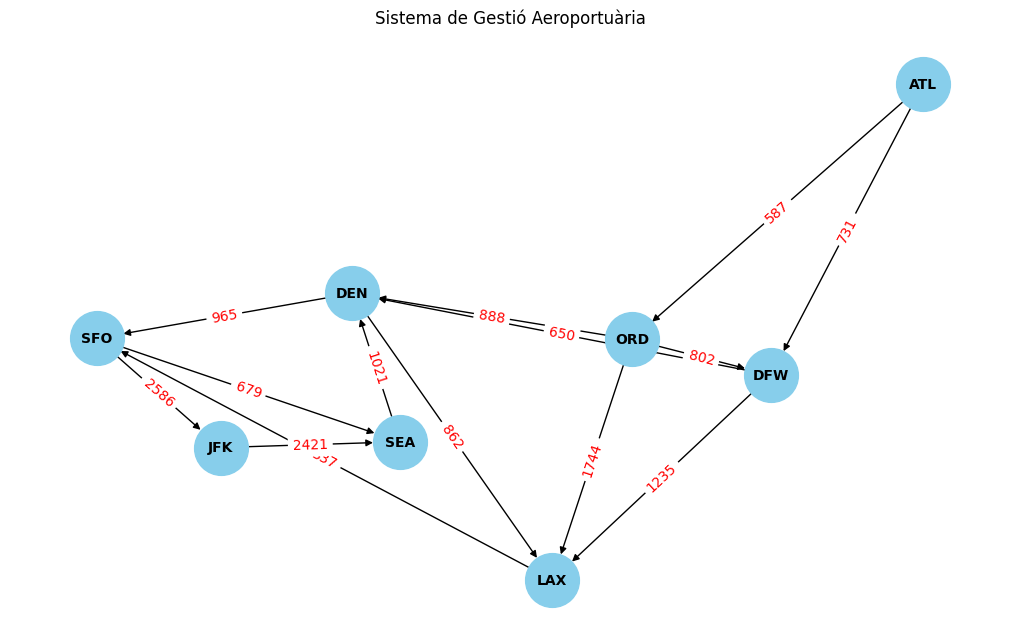

In [ ]:
#Djistra algorithm
# Importació de les llibreries necessàries
import networkx as nx  # Importem NetworkX per crear i manipular grafs
import matplotlib.pyplot as plt  # Importem Matplotlib per visualitzar el graf

# Creació del graf
G = nx.DiGraph()  # Creem un graf dirigit (DiGraph) amb NetworkX

# Afegim nodes (aeroports) al graf
airports = ["ATL", "ORD", "DFW", "DEN", "LAX", "SFO", "JFK", "SEA"]  # Llista d'aeroports
for airport in airports:
    G.add_node(airport)  # Afegim cada aeroport com a node al graf

# Afegim arestes (rutes) amb pesos (distàncies) al graf
routes = {  # Diccionari que conté les rutes i les seves distàncies
    ("ATL", "ORD"): 587,
    ("ATL", "DFW"): 731,
    ("ORD", "DEN"): 888,
    ("ORD", "LAX"): 1744,
    ("ORD", "DFW"): 802,
    ("DFW", "DEN"): 650,
    ("DFW", "LAX"): 1235,
    ("DEN", "LAX"): 862,
    ("DEN", "SFO"): 965,
    ("LAX", "SFO"): 337,
    ("SFO", "JFK"): 2586,
    ("SFO", "SEA"): 679,
    ("JFK", "SEA"): 2421,
    ("SEA", "DEN"): 1021
}
for route, distance in routes.items():
    G.add_edge(route[0], route[1], weight=distance)  # Afegim cada ruta com una aresta al graf amb el pes (distància)

# Dibuixem el graf
plt.figure(figsize=(10, 6))  # Creem una nova figura amb una mida específica
pos = nx.spring_layout(G, seed=42)  # Calculem les posicions dels nodes amb un algoritme específic de NetworkX
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold")  # Dibuixem el graf amb nodes etiquetats, mida específica, color, i altres paràmetres visuals
edge_labels = nx.get_edge_attributes(G, 'weight')  # Obtenim els atributs d'aresta (pes) com etiquetes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')  # Dibuixem les etiquetes d'aresta (distàncies) amb un color específic
plt.title("Sistema de Gestió Aeroportuària")  # Afegim un títol al gràfic
plt.axis('off')  # Desactivem l'eix de coordenades
plt.show()  # Mostrem el gràfic

Camí trobat: ['ATL', 'ORD', 'LAX', 'SFO', 'SEA']


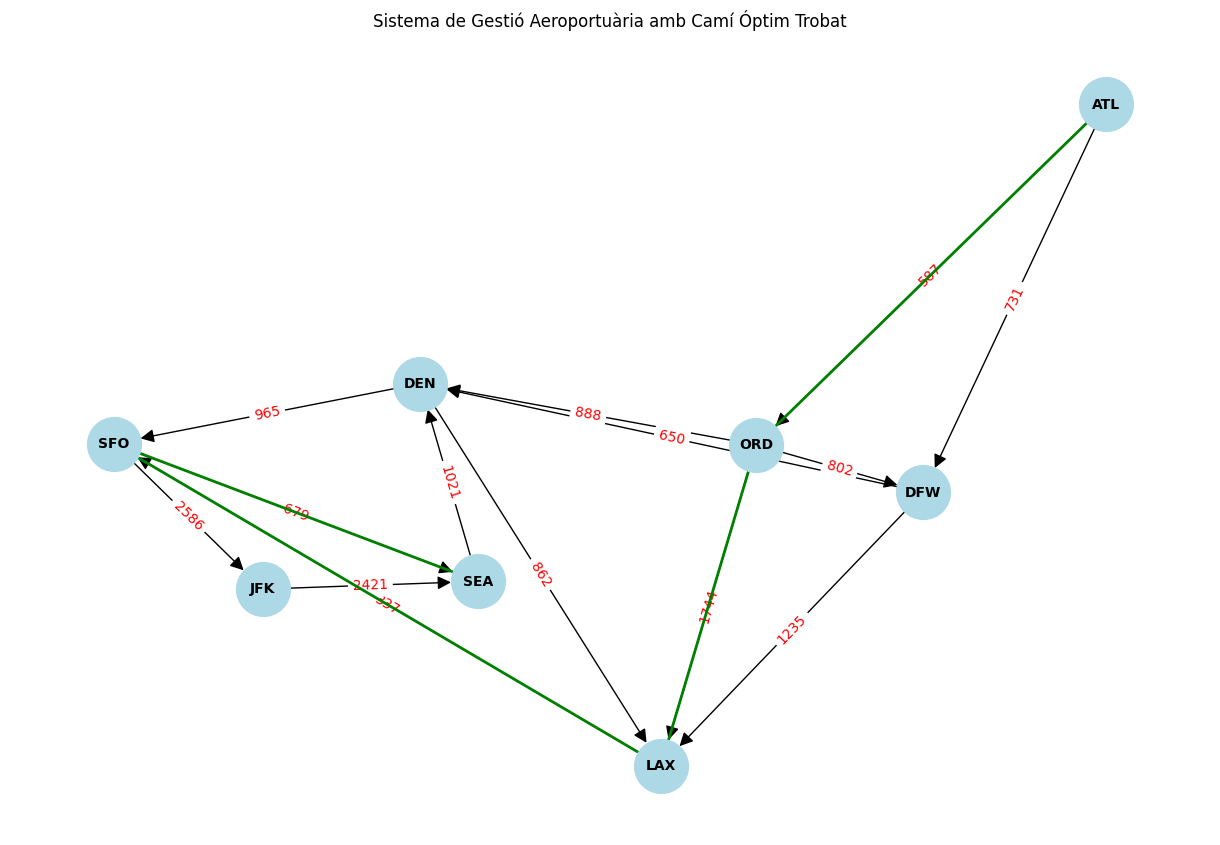

In [ ]:
# Star algorithm
import networkx as nx
import matplotlib.pyplot as plt
import heapq

class Node:
    def __init__(self, state, parent=None, cost=0, heuristic=0):
        self.state = state  # Estat del node
        self.parent = parent  # Node pare
        self.cost = cost  # Cost del camí des del node inicial fins aquí
        self.heuristic = heuristic  # Valor heurístic (estimació del cost restant)

    def __lt__(self, other):
        # Comparació de nodes basada en el cost total
        return (self.cost + self.heuristic) < (other.cost + other.heuristic)

def astar(start_state, goal_state, graph, heuristic):
    open_set = []  # Conjunt de nodes a explorar
    closed_set = set()  # Conjunt de nodes explorats

    start_node = Node(start_state, None, 0, heuristic(start_state, goal_state))
    heapq.heappush(open_set, start_node)  # Afegir l'inici al conjunt obert

    while open_set:
        current_node = heapq.heappop(open_set)  # Treure el node amb el cost total més baix
        if current_node.state == goal_state:
            # Hem arribat al node objectiu
            path = []
            while current_node:
                path.append(current_node.state)
                current_node = current_node.parent
            return path[::-1]  # Retornar el camí des del principi fins al final (invertit)

        closed_set.add(current_node.state)  # Afegir el node actual al conjunt tancat

        for neighbor, cost in graph[current_node.state].items():
            if neighbor in closed_set:
                # Si el veí ja ha estat explorat, saltar a la següent iteració del bucle
                continue

            # Calcular el cost del camí fins al veí
            new_cost = current_node.cost + cost
            # Crear un nou node per al veí
            neighbor_node = Node(neighbor, current_node, new_cost, heuristic(neighbor, goal_state))

            # Afegir el veí al conjunt obert
            heapq.heappush(open_set, neighbor_node)

    # Si no es troba cap camí
    return None

# Exemple de graella 2D amb distàncies entre aeroports
airport_distances = {
    "ATL": {"ORD": 587, "DFW": 731},
    "ORD": {"DEN": 888, "LAX": 1744, "DFW": 802},
    "DFW": {"DEN": 650, "LAX": 1235},
    "DEN": {"LAX": 862, "SFO": 965},
    "LAX": {"SFO": 337},
    "SFO": {"JFK": 2586, "SEA": 679},
    "JFK": {"SEA": 2421},
    "SEA": {"DEN": 1021}
}

# Funció heurística (distància de vol entre els aeroports)
def heuristic(state, goal):
    return airport_distances[state].get(goal, float('inf'))

# Nodes d'inici i final
start = "ATL"
goal = "SEA"

# Executar l'algoritme A*
path = astar(start, goal, airport_distances, heuristic)
print("Camí trobat:", path)

# Crear un graf dirigit amb NetworkX
G = nx.DiGraph()

# Afegir nodes (aeroports)
for airport in airport_distances:
    G.add_node(airport)

# Afegir arestes (rutes) amb pesos (distàncies)
for source, destinations in airport_distances.items():
    for destination, distance in destinations.items():
        G.add_edge(source, destination, weight=distance)

# Dibuixar el gràfic
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1500, node_color="lightblue", font_size=10, font_weight="bold", arrowsize=20)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Dibuixar el camí trobat
if path:
    for i in range(len(path)-1):
        nx.draw_networkx_edges(G, pos, edgelist=[(path[i], path[i+1])], edge_color='green', width=2.0)

plt.title("Sistema de Gestió Aeroportuària amb Camí Óptim Trobat")
plt.axis('off')
plt.show()